In [1]:
import numpy as np 
import matplotlib.pyplot as plt  

# numpy: mathematices, especially linear algebra 
# matplotlib.pyplot: matrix plot library,  python plot 

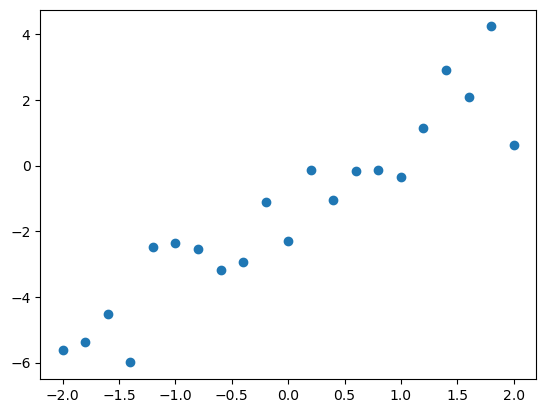

In [5]:
# Supervised Learning 
# data: artifical data 
m = 20 + 1 # linspace: 
x = np.linspace(-2, 2, m) 
y = 2 * x - 1 # groundtruth: Suppose we don't know the relation of (x, y) 
y += np.random.randn(m) # plus gussian noise 
plt.scatter(x, y) 

# Linear Regression 
### One-Variable Linear Regression
Given dataset $\{(x_i, y_i), x_i \in R, y_i \in R, i = 1, 2,...,m\}$, suppose the objective function: 
$$y = x \cdot w + b \tag{1.1}$$ 
- The loss function: $$\text{loss} = (x\cdot w + b -y)^2 \tag{1.2}$$
- The cost function: $$\mathcal{J} = \frac 1 {2m}\sum_{i=1}^m (x_i \cdot w + b - y_i)^2 \tag{1.3}$$
- Denote $x = [x_1, x_2, ..., x_m], y = [y_1, y_2, ..., y_m]$
- The cost function: $$\mathcal{J} = \frac 1{2m} (x\cdot w+b-y)^T (x\cdot w+b-y)$$
- Get the optimal $w, b$ by Gradient Descent:
  $$w = w - \alpha \cdot \frac{dJ}{dw}, b = b - \alpha \cdot \frac{dJ}{db}$$

In [7]:
def cost(x, y, w, b): 
    error = x * w + b - y;   return error.dot(error) / (2*len(y)) 
def gradient(x, y, w, b): 
    error = x * w + b - y;  m = len(y);  dw = x.T.dot(error) / m; db = np.sum(error) / m
    return dw, db

In [8]:
w, b = 0.0, 0.0  # init params  
alpha = 0.1 
for i in range(100):
    dw, db = gradient(x, y, w, b)
    w = w - alpha * dw
    b = b - alpha * db

w =  2.0745364421953743 b =  -1.3887491152351354


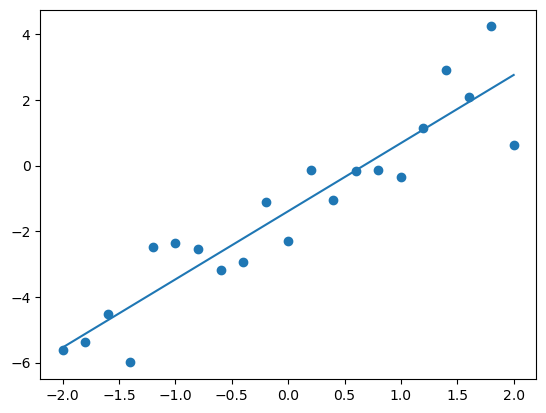

In [10]:
print("w = ", w, "b = ", b)
pred = x * w + b 
plt.scatter(x, y) 
plt.plot(x, pred)

## Multiple Linear Regression  
Given the dataset $\{(x_i, y_i), x_i \in R^n, y_i \in R, i = 1,2,..., m\}$, the objective function: $$y = <x, w> + b\tag{2.1}$$

- In machine Learning, we use row vector to denote data; column vector the denote params.


## Vector (in Python) 

1. good or bug: vector is no row or column. 

In [12]:
x = np.array([1, 2, 3]) # x is row vector or column vector? Both.
x 

array([1, 2, 3])

In [13]:
x.T.dot(x),  x.dot(x), x.dot(x.T)

(14, 14, 14)

In [14]:
x.T

array([1, 2, 3])

## Polynomial Regression 
$$y = b + w_1 x + w_2 x^2 = b + \begin{bmatrix}x &x^2\end{bmatrix} 
\begin{bmatrix} w_1 \\ w_2\end{bmatrix} \tag{2.2}$$ 
- Captical $X$, $X=\begin{bmatrix} x & x^2\end{bmatrix}$, $w = \begin{bmatrix} w_1\\w_2\end{bmatrix}$
- The objective function $$y = Xw + b\tag{2.3}$$
- The cost function in vector: $$J = \frac 1 {2m}(Xw + b-y)^T(Xw+b-y)\tag{2.4}$$
- $\|u\| = \sqrt{u^Tu}$, $$J = \frac 1 {2m} \|Xw+b-y\|^2 \tag{2.5}$$
- Gradient: $$dw = X^T (Xw + b - y) /m , db = \sum(Xw + b - y) / m \tag{2.6}$$

array([[-2.  ,  4.  ],
       [-1.8 ,  3.24],
       [-1.6 ,  2.56],
       [-1.4 ,  1.96],
       [-1.2 ,  1.44],
       [-1.  ,  1.  ],
       [-0.8 ,  0.64],
       [-0.6 ,  0.36],
       [-0.4 ,  0.16],
       [-0.2 ,  0.04],
       [ 0.  ,  0.  ],
       [ 0.2 ,  0.04],
       [ 0.4 ,  0.16],
       [ 0.6 ,  0.36],
       [ 0.8 ,  0.64],
       [ 1.  ,  1.  ],
       [ 1.2 ,  1.44],
       [ 1.4 ,  1.96],
       [ 1.6 ,  2.56],
       [ 1.8 ,  3.24],
       [ 2.  ,  4.  ]])

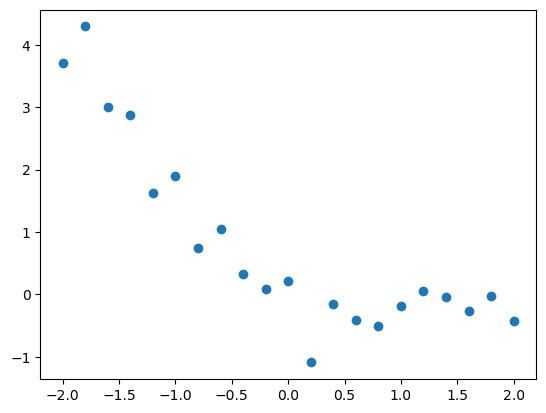

In [30]:
m = 20 + 1 
x = np.linspace(-2, 2, m) 
y = 0.5 * x**2 - x + 0.2 + np.random.randn(m) * 0.5 
plt.scatter(x, y)
X = np.c_[x, x**2] 
X 

In [31]:
def cost2(X, y, w, b): 
    error = X.dot(w) + b - y # only difference: * -> dot
    return error.dot(error) / len(y)
def gradient2(X, y, w, b): 
    error = X.dot(w) + b - y
    dw = X.T.dot(error) / len(y)
    db = np.sum(error) / len(y)
    return dw, db

In [36]:
w = np.zeros(2) # Two-dimension
b = 0.0
alpha = 0.1
Js = [] 
for i in range(100):
    dw, db = gradient2(X, y, w, b)
    w = w - alpha * dw; b = b - alpha * db
    J = cost2(X, y, w, b)
    Js.append(J)

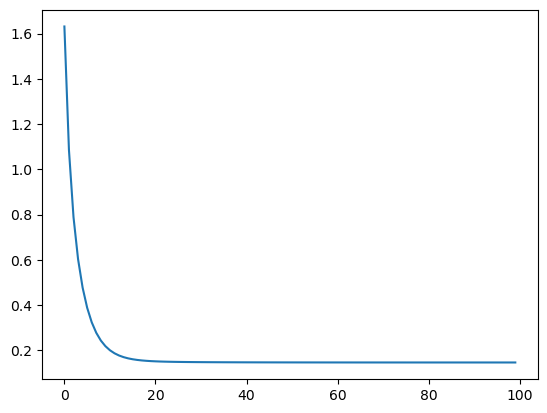

In [37]:
plt.plot(Js)

In [33]:
w, b

(array([-1.02788022,  0.53846545]), 0.011088740011476896)

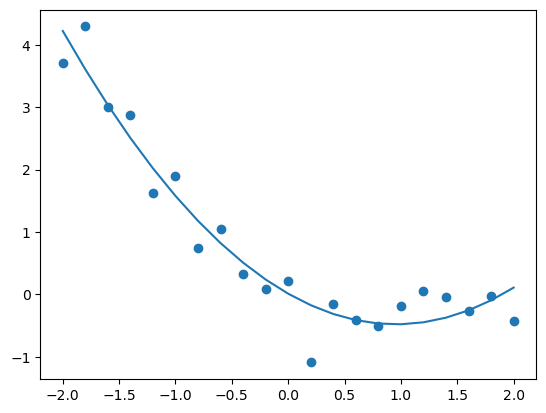

In [34]:
plt.scatter(x, y) 
pred = X.dot(w) + b 
plt.plot(x, pred)